In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['agg.path.chunksize'] = 10000

Cargamos los datos y convertimos "fecha" a tipo datetime

In [2]:
modelar = pd.read_csv("/home/harry/Datathon-Cajamar-2021/data/Modelar_UH2021.txt", sep="|", encoding="utf-8", low_memory=False)
modelar['fecha'] = pd.to_datetime(modelar['fecha'],format='%d/%m/%Y %H:%M:%S')

In [3]:
modelar

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
0,2015-06-01,21972,0,C,75.0,No Rotura,NaN,0,0,5241.0,0
1,2015-06-01,23910,5,C,170.0,No Rotura,"6,07",0,0,5241.0,3
2,2015-06-01,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
3,2015-06-01,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
4,2015-06-01,27144,15,E,230.0,No Rotura,NaN,0,0,4064.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4045017,2016-09-30,457416,1395,F,336.0,No Rotura,"50,38",0,0,130.0,9
4045018,2016-09-30,457422,1080,F,336.0,Rotura,NaN,0,0,130.0,0
4045019,2016-09-30,458650,1385,K,340.0,No Rotura,NaN,0,0,126.0,0
4045020,2016-09-30,458660,1915,K,340.0,No Rotura,"68,49",0,0,126.0,24


In [4]:
estimar = pd.read_csv("/home/harry/Datathon-Cajamar-2021/data/Estimar_UH2021.txt", sep="|", encoding="utf-8", low_memory=False)
estimar['fecha'] = pd.to_datetime(estimar['fecha'])

In [5]:
estimar

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad
0,2016-10-01,21972,5,C,75,No Rotura,"5,84",0,0,5150
1,2016-10-02,21972,15,C,75,No Rotura,"5,84",0,0,5150
2,2016-10-03,21972,5,C,75,No Rotura,"5,84",0,0,5150
3,2016-10-04,21972,5,C,75,No Rotura,"5,84",0,0,5150
4,2016-10-05,21972,0,C,75,No Rotura,"5,84",0,0,5150
...,...,...,...,...,...,...,...,...,...,...
218258,2016-12-26,458660,1085,K,340,No Rotura,"70,85",1,0,35
218259,2016-12-27,458660,965,K,340,No Rotura,"70,85",1,0,35
218260,2016-12-28,458660,1005,K,340,No Rotura,"70,85",1,0,35
218261,2016-12-29,458660,745,K,340,No Rotura,"70,85",1,0,35


# Data info

In [6]:
modelar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045022 entries, 0 to 4045021
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   fecha              datetime64[ns]
 1   id                 int64         
 2   visitas            int64         
 3   categoria_uno      object        
 4   categoria_dos      float64       
 5   estado             object        
 6   precio             object        
 7   dia_atipico        int64         
 8   campaña            int64         
 9   antiguedad         float64       
 10  unidades_vendidas  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 339.5+ MB


In [5]:
estimar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218263 entries, 0 to 218262
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   fecha          218263 non-null  datetime64[ns]
 1   id             218263 non-null  int64         
 2   visitas        218263 non-null  int64         
 3   categoria_uno  218263 non-null  object        
 4   categoria_dos  218263 non-null  object        
 5   estado         218263 non-null  object        
 6   precio         218263 non-null  object        
 7   dia_atipico    218263 non-null  int64         
 8   campaña        218263 non-null  int64         
 9   antiguedad     218263 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 16.7+ MB


### - "categoria_dos" es float64 en modelar, y object en estimar
### - "antiguedad" es float64 en modelar, y object en estimar

In [47]:
modelar.isnull().sum()

fecha                      0
id                         0
visitas                    0
categoria_uno              0
categoria_dos           5844
estado                     0
precio               2642911
dia_atipico                0
campaña                    0
antiguedad            874165
unidades_vendidas          0
dtype: int64

- Más de la mitad de las entradas de "precio" son nulas
- Casi 1/4 de las entradas de "antiguedad" son nulas

In [41]:
estimar.isnull().sum()

fecha            0
id               0
visitas          0
categoria_uno    0
categoria_dos    0
estado           0
precio           0
dia_atipico      0
campaña          0
antiguedad       0
dtype: int64

Hay rows duplicadas en Modelar?

In [6]:
len(modelar)-len(modelar.drop_duplicates())

2004985

Y en Estimar?

In [8]:
len(estimar)-len(estimar.drop_duplicates())

0

# Correlation Matrix

### Modelar

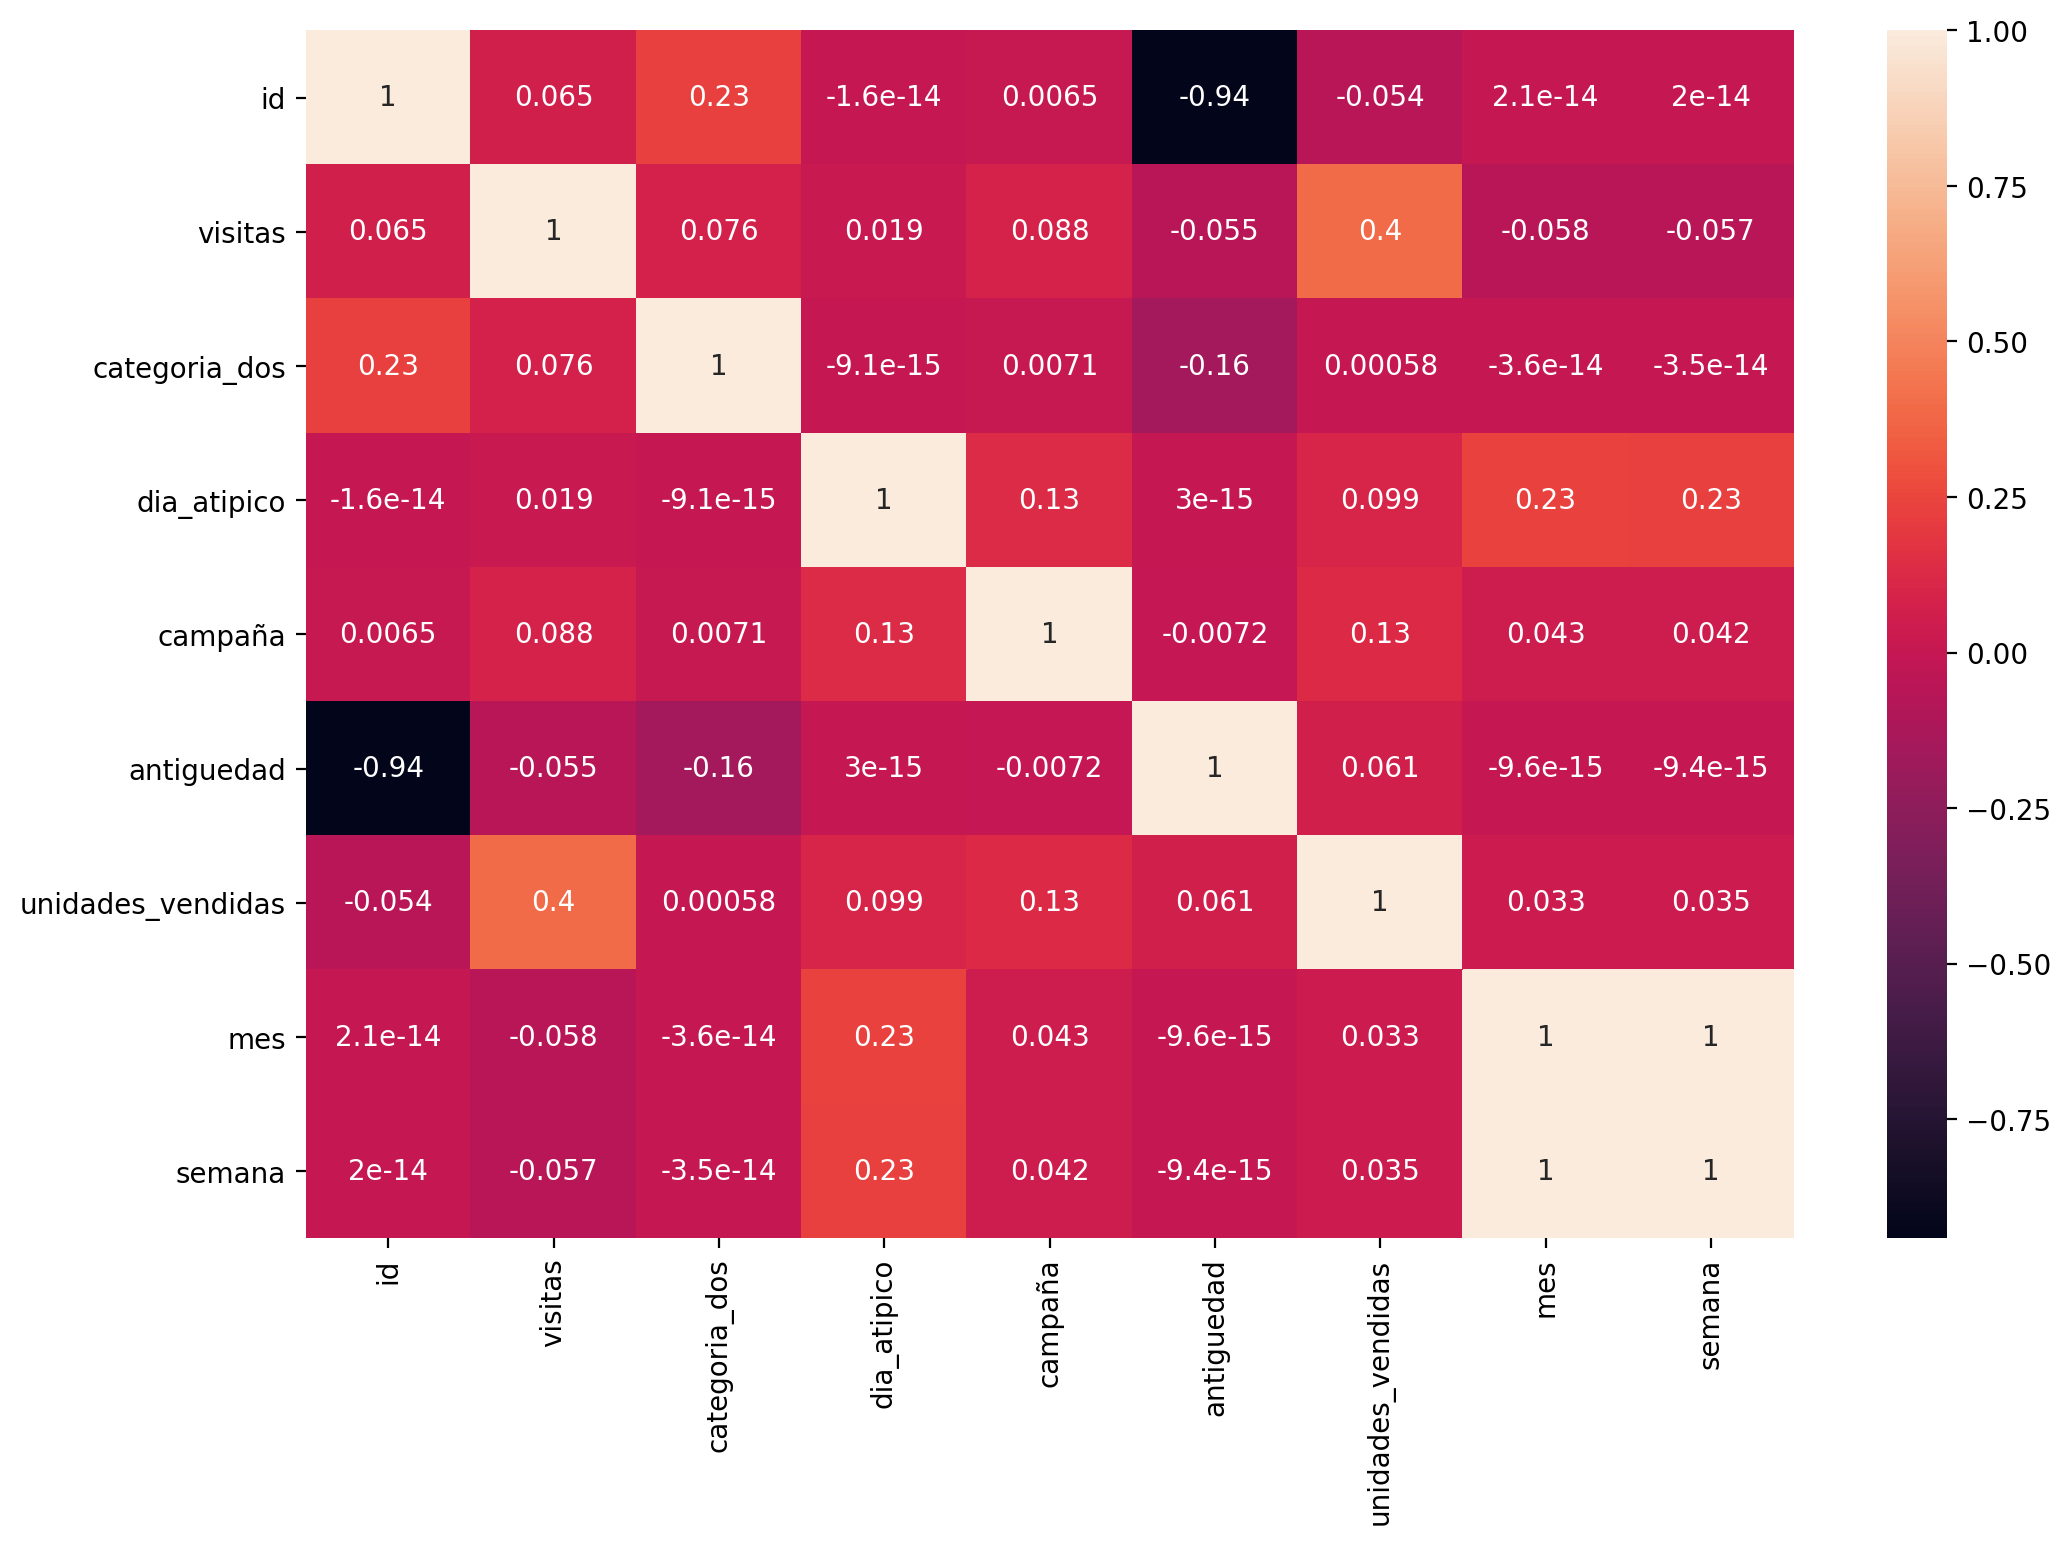

In [99]:
sn.heatmap(modelar.corr(), annot=True)
plt.show()

- Correlación media entre "unidades_vendidas" y "visitas"
- Ligera correlación entre "categoria_dos" y "id" -> Ya que tenemos algunos NaN en "categoria_dos", quizás podemos inferir su valor usando el "id"
- Alta correlación entre "id" y "antiguedad" -> Ya que casi un cuarto de los valores de "antiguedad" son NaN, podemos usar el "id" para inferir estos valores

# ID: número identificador del artículo.

In [7]:
modelar["id"].value_counts()

260338    11688
312102     9740
91226      6331
214272     5844
235850     5844
          ...  
336794      487
158578      487
301996      487
340966      487
409400      487
Name: id, Length: 4168, dtype: int64

4168 productos distintos en Modelar

In [8]:
estimar["id"].value_counts()

312102    178
260338    158
360016    112
280386     92
306092     92
         ... 
173088      1
334354      1
349074      1
345802      1
350248      1
Name: id, Length: 2894, dtype: int64

2894 productos distintos en Estimar

### En Modelar tenemos el doble de articulos distintos

Hay articulos en Estimar que no aparecen en Modelar?

In [13]:
estimar.id.isin(modelar.id).sum()

218263

### Todos los articulos de Estimar aparecen en Modelar

In [16]:
modelar['id'].value_counts().describe()

count     4168.000000
mean       970.494722
std        900.451632
min        487.000000
25%        487.000000
50%        487.000000
75%        974.000000
max      11688.000000
Name: id, dtype: float64

In [17]:
estimar['id'].value_counts().describe()

count    2894.000000
mean       75.419143
std        25.725535
min         1.000000
25%        68.250000
50%        89.000000
75%        92.000000
max       178.000000
Name: id, dtype: float64

Deberiamos tratar la variable ID como object y no como int64

Tenemos mas de 4000 productos distintos en la variable id, como podemos codificar esta variable? Target-Mean encoding?

# Visitas: número de veces que ha sido visualizada la ficha de un producto dado para un día concreto

In [35]:
modelar.groupby(["id"])['visitas'].mean()

id
21972       7.043121
23910      21.804928
24306      11.039014
27144      41.689938
27504      23.034908
             ...    
456982    297.248460
457416     60.523614
457422    147.720739
458650     96.765914
458660     77.915811
Name: visitas, Length: 4168, dtype: float64

In [36]:
estimar.groupby(["id"])['visitas'].mean()

id
21972        5.769231
23910       35.333333
27144       79.782609
27504       48.055556
30014       16.739130
             ...     
456982    3455.820896
457416    3004.777778
457422    1459.277778
458650     583.586957
458660    1357.471910
Name: visitas, Length: 2894, dtype: float64

<AxesSubplot:ylabel='Density'>

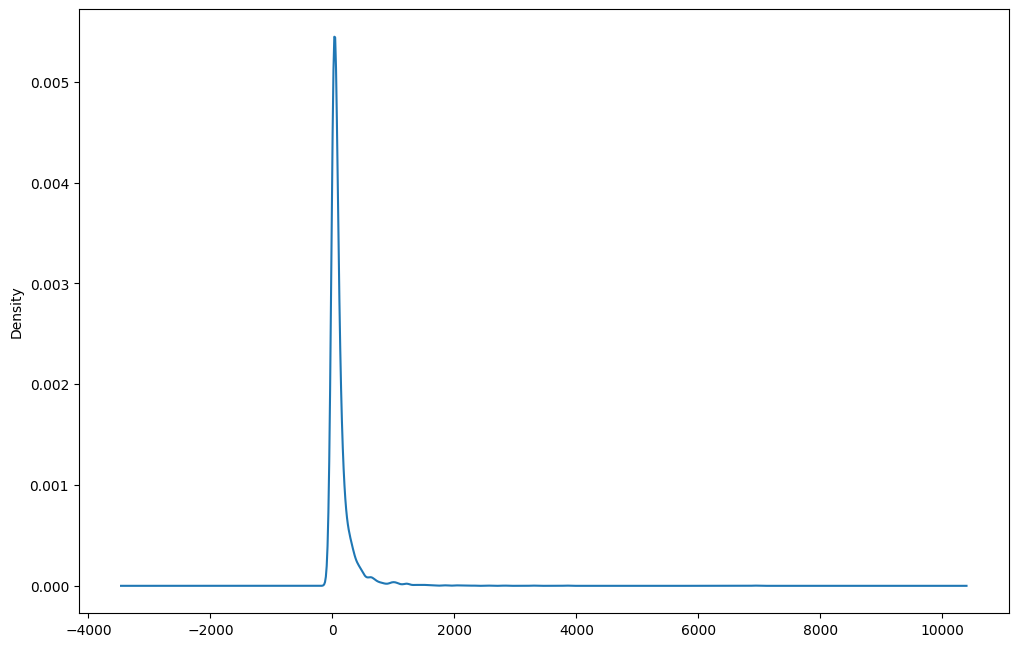

In [37]:
modelar.groupby(["id"])['visitas'].mean().plot.kde()

<AxesSubplot:ylabel='Density'>

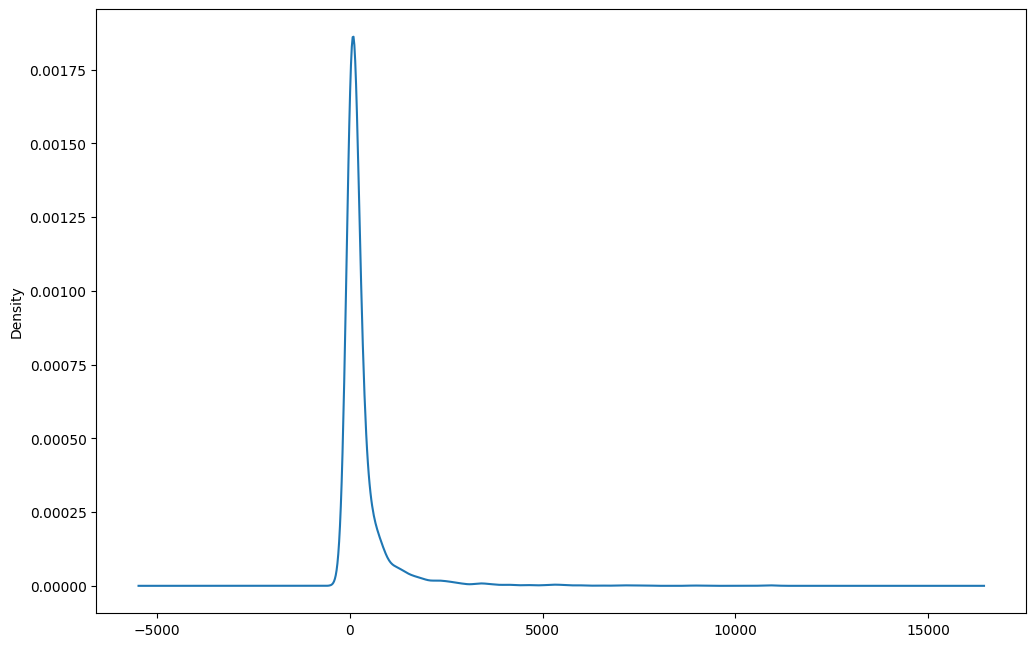

In [38]:
estimar.groupby(["id"])['visitas'].mean().plot.kde()

# Categoria 1

In [15]:
modelar['categoria_uno'].nunique()

13

In [6]:
modelar['categoria_uno'].value_counts()

A    1571062
K     581478
H     489922
F     458267
E     322394
G     174346
C     173372
L     115419
B      78407
I      67206
O       7305
N       5357
D        487
Name: categoria_uno, dtype: int64

In [14]:
estimar['categoria_uno'].nunique()

13

In [7]:
estimar['categoria_uno'].value_counts()

A    84014
C    27500
K    24100
E    17457
F    17320
H    14606
G    14313
B     9112
L     5376
I     3459
O      463
N      451
D       92
Name: categoria_uno, dtype: int64

13 categorias para Modelar y Estimar

# categoria_2

In [16]:
modelar['categoria_dos'].nunique()

182

In [19]:
estimar['categoria_dos'].nunique()

170

Hay categorias de categoria_2 que están en Estimar pero no en Modelar?

In [20]:
estimar.categoria_dos.isin(modelar.categoria_dos).sum()

0

Los valores en Modelar están en float, y en Estimar en object, por eso no hay matches

Convertimos estimar['categoria_dos'] a float, pero hay algunos valores que no son numericos que sustituiremos por NaN

In [12]:
estimar['categoria_dos'] = pd.to_numeric(estimar['categoria_dos'], errors = 'coerce') 

In [8]:
estimar.isnull().sum()

fecha              0
id                 0
visitas            0
categoria_uno      0
categoria_dos    438
estado             0
precio             0
dia_atipico        0
campaña            0
antiguedad         0
dtype: int64

In [ ]:
Veamos que contenian los valores que hemos sustituido por NaN

In [9]:
estimar[estimar['categoria_dos'].isna()]

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad
77038,2016-10-02,212250,170,A,NaN,No Rotura,"47,74",0,0,1071
77039,2016-10-03,212250,235,A,NaN,No Rotura,"47,74",0,0,1071
77040,2016-10-04,212250,125,A,NaN,No Rotura,"47,74",0,0,1071
77041,2016-10-05,212250,205,A,NaN,No Rotura,"47,74",0,0,1071
77042,2016-10-06,212250,90,A,NaN,No Rotura,"47,74",-1,0,1071
...,...,...,...,...,...,...,...,...,...,...
206810,2016-12-22,408726,70,F,NaN,No Rotura,"119,95",1,0,148
206811,2016-12-23,408726,70,F,NaN,No Rotura,"119,95",1,0,148
206812,2016-12-24,408726,50,F,NaN,No Rotura,"119,95",1,0,148
206813,2016-12-25,408726,45,F,NaN,No Rotura,"119,95",1,0,148


In [11]:
estimar.iloc[77038:77042,]

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad
77038,2016-10-02,212250,170,A,-,No Rotura,"47,74",0,0,1071
77039,2016-10-03,212250,235,A,-,No Rotura,"47,74",0,0,1071
77040,2016-10-04,212250,125,A,-,No Rotura,"47,74",0,0,1071
77041,2016-10-05,212250,205,A,-,No Rotura,"47,74",0,0,1071


Los NaNs eran "-"

### Ojo, a lo mejor no es buena idea convertir los "-" a NaN. Tendremos que hacer pruebas

Veamos ahora si las categorias de categoria_2 que están en Estimar están en Modelar?

In [13]:
estimar.categoria_dos.isin(modelar.categoria_dos).sum()

218263

Si. Todas las categorias de categoria_2 que están en Estimar están en Modelar

Comprobación: ¿Hay categorias de categoria_dos que pertenecen a 2 o mas categorias de categoria_uno????

In [53]:
categoria_dos_list = modelar["categoria_dos"].unique().tolist()
n_v =0
for cat in categoria_dos_list:
    n_v += (modelar[modelar["categoria_dos"]==cat][["id","categoria_uno",'categoria_dos']])["categoria_uno"].nunique()
f = n_v/(len(categoria_dos_list)-1) - 1 #Descontamos la cateogria NaN de len(categoria_dos_list)
if f==0:
    print("Cada categoria de categoria_dos solo pertenece a una categoria de categoria_uno")
if f!=0:
    print("Hay categorias de categoria_dos que pertenecen a 2 o mas categorias de categoria_uno")

Cada categoria de categoria_dos solo pertenece a una categoria de categoria_uno


# estado

In [14]:
modelar["estado"].value_counts()

No Rotura    3388184
Rotura        606530
Transito       50308
Name: estado, dtype: int64

In [15]:
estimar["estado"].value_counts()

No Rotura    215845
Transito       2418
Name: estado, dtype: int64

# precio

En ambos Precio es object

In [12]:
modelar["precio"].value_counts()

28,92     25076
19,45     24635
24,67     22428
22,23     20947
40,15     17443
          ...  
56,62         1
44,72         1
86,04         1
84,84         1
104,32        1
Name: precio, Length: 8191, dtype: int64

In [17]:
estimar["precio"].value_counts()

8,82     3594
10,76    3348
19,45    2947
11,86    2648
10,17    2143
         ... 
19,64       1
44,14       1
68,43       1
39,26       1
13,26       1
Name: precio, Length: 3413, dtype: int64

Hay más precios distintos que productos

Habrá que pensar como tratar esta variable: variacion media por mes?

# dia_atipico

In [18]:
modelar["dia_atipico"].value_counts()

 0    3505132
 1     398688
-1     141202
Name: dia_atipico, dtype: int64

In [19]:
estimar["dia_atipico"].value_counts()

 0    143537
 1     67241
-1      7485
Name: dia_atipico, dtype: int64

# campaña

In [20]:
modelar["campaña"].value_counts()

0    4033689
1      11333
Name: campaña, dtype: int64

In [21]:
estimar["campaña"].value_counts()

0    215138
1      3125
Name: campaña, dtype: int64

# antiguedad

In [22]:
modelar["antiguedad"].value_counts()

921.0     33603
984.0     25811
1204.0    25324
662.0     24350
432.0     20941
          ...  
2498.0      487
243.0       487
2990.0      487
3584.0      487
4173.0      487
Name: antiguedad, Length: 1154, dtype: int64

<AxesSubplot:ylabel='Density'>

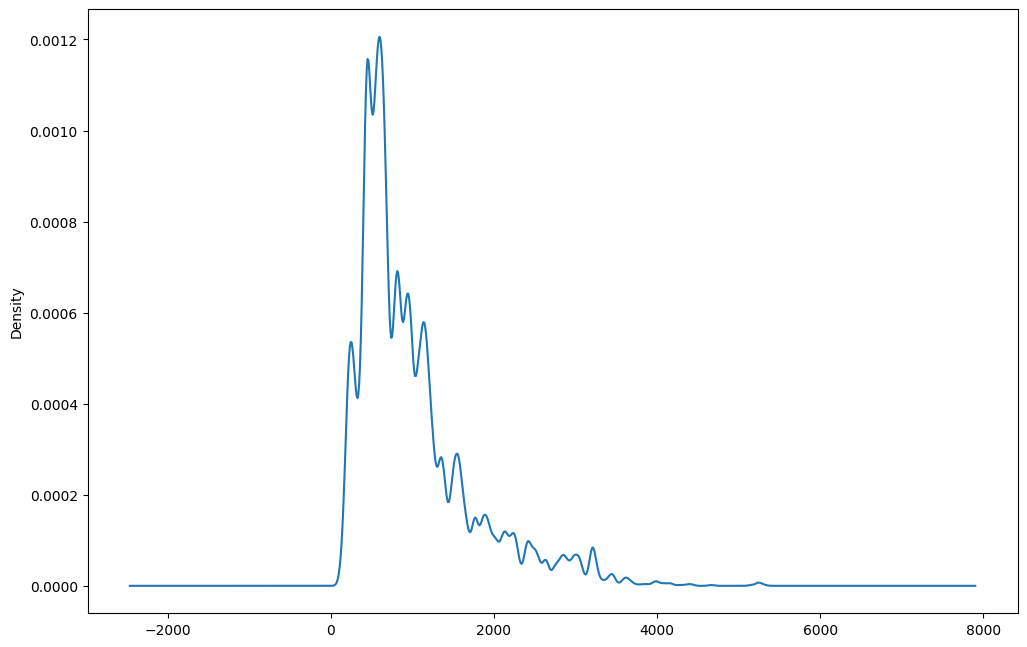

In [28]:
modelar["antiguedad"].plot.kde()

In [23]:
estimar["antiguedad"].value_counts()

-       5422
586     2349
180     1742
341     1157
830     1123
        ... 
937        1
1076       1
1407       1
979        1
356        1
Name: antiguedad, Length: 1111, dtype: int64

"antiguedad" en Estimar es object, lo convertimos a numeric

In [30]:
estimar['antiguedad'] = pd.to_numeric(estimar['antiguedad'], errors = 'coerce') 

<AxesSubplot:ylabel='Density'>

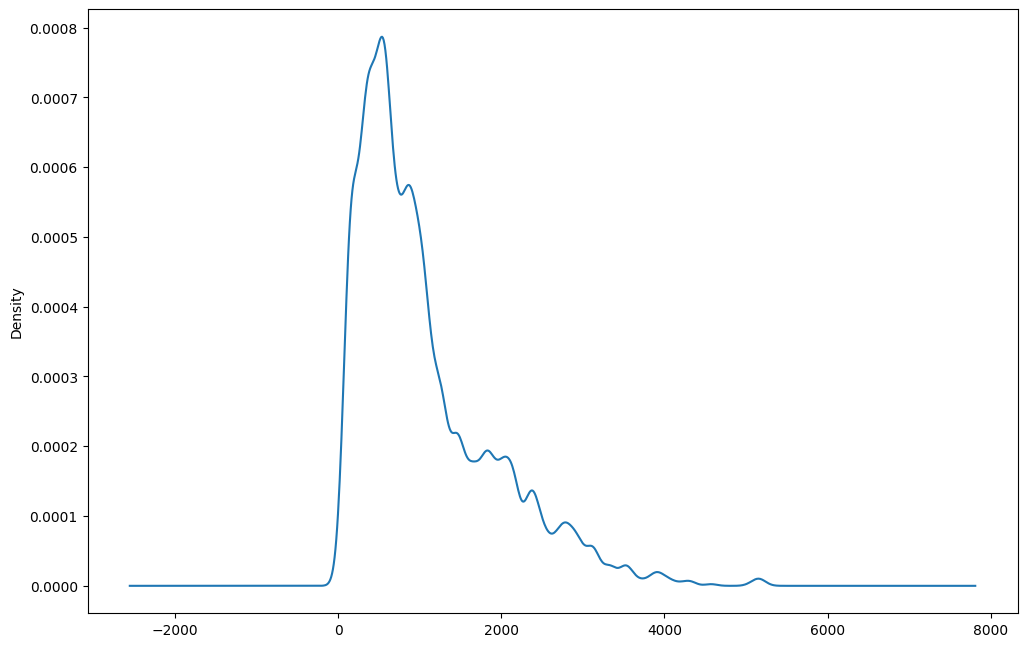

In [31]:
estimar["antiguedad"].plot.kde()

# Correlaciones

## "id" y "categoria_dos"

In [26]:
modelar

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
0,2015-01-06,21972,0,C,75.0,No Rotura,NaN,0,0,5241.0,0
1,2015-01-06,23910,5,C,170.0,No Rotura,"6,07",0,0,5241.0,3
2,2015-01-06,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
3,2015-01-06,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
4,2015-01-06,27144,15,E,230.0,No Rotura,NaN,0,0,4064.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4045017,2016-09-30,457416,1395,F,336.0,No Rotura,"50,38",0,0,130.0,9
4045018,2016-09-30,457422,1080,F,336.0,Rotura,NaN,0,0,130.0,0
4045019,2016-09-30,458650,1385,K,340.0,No Rotura,NaN,0,0,126.0,0
4045020,2016-09-30,458660,1915,K,340.0,No Rotura,"68,49",0,0,126.0,24


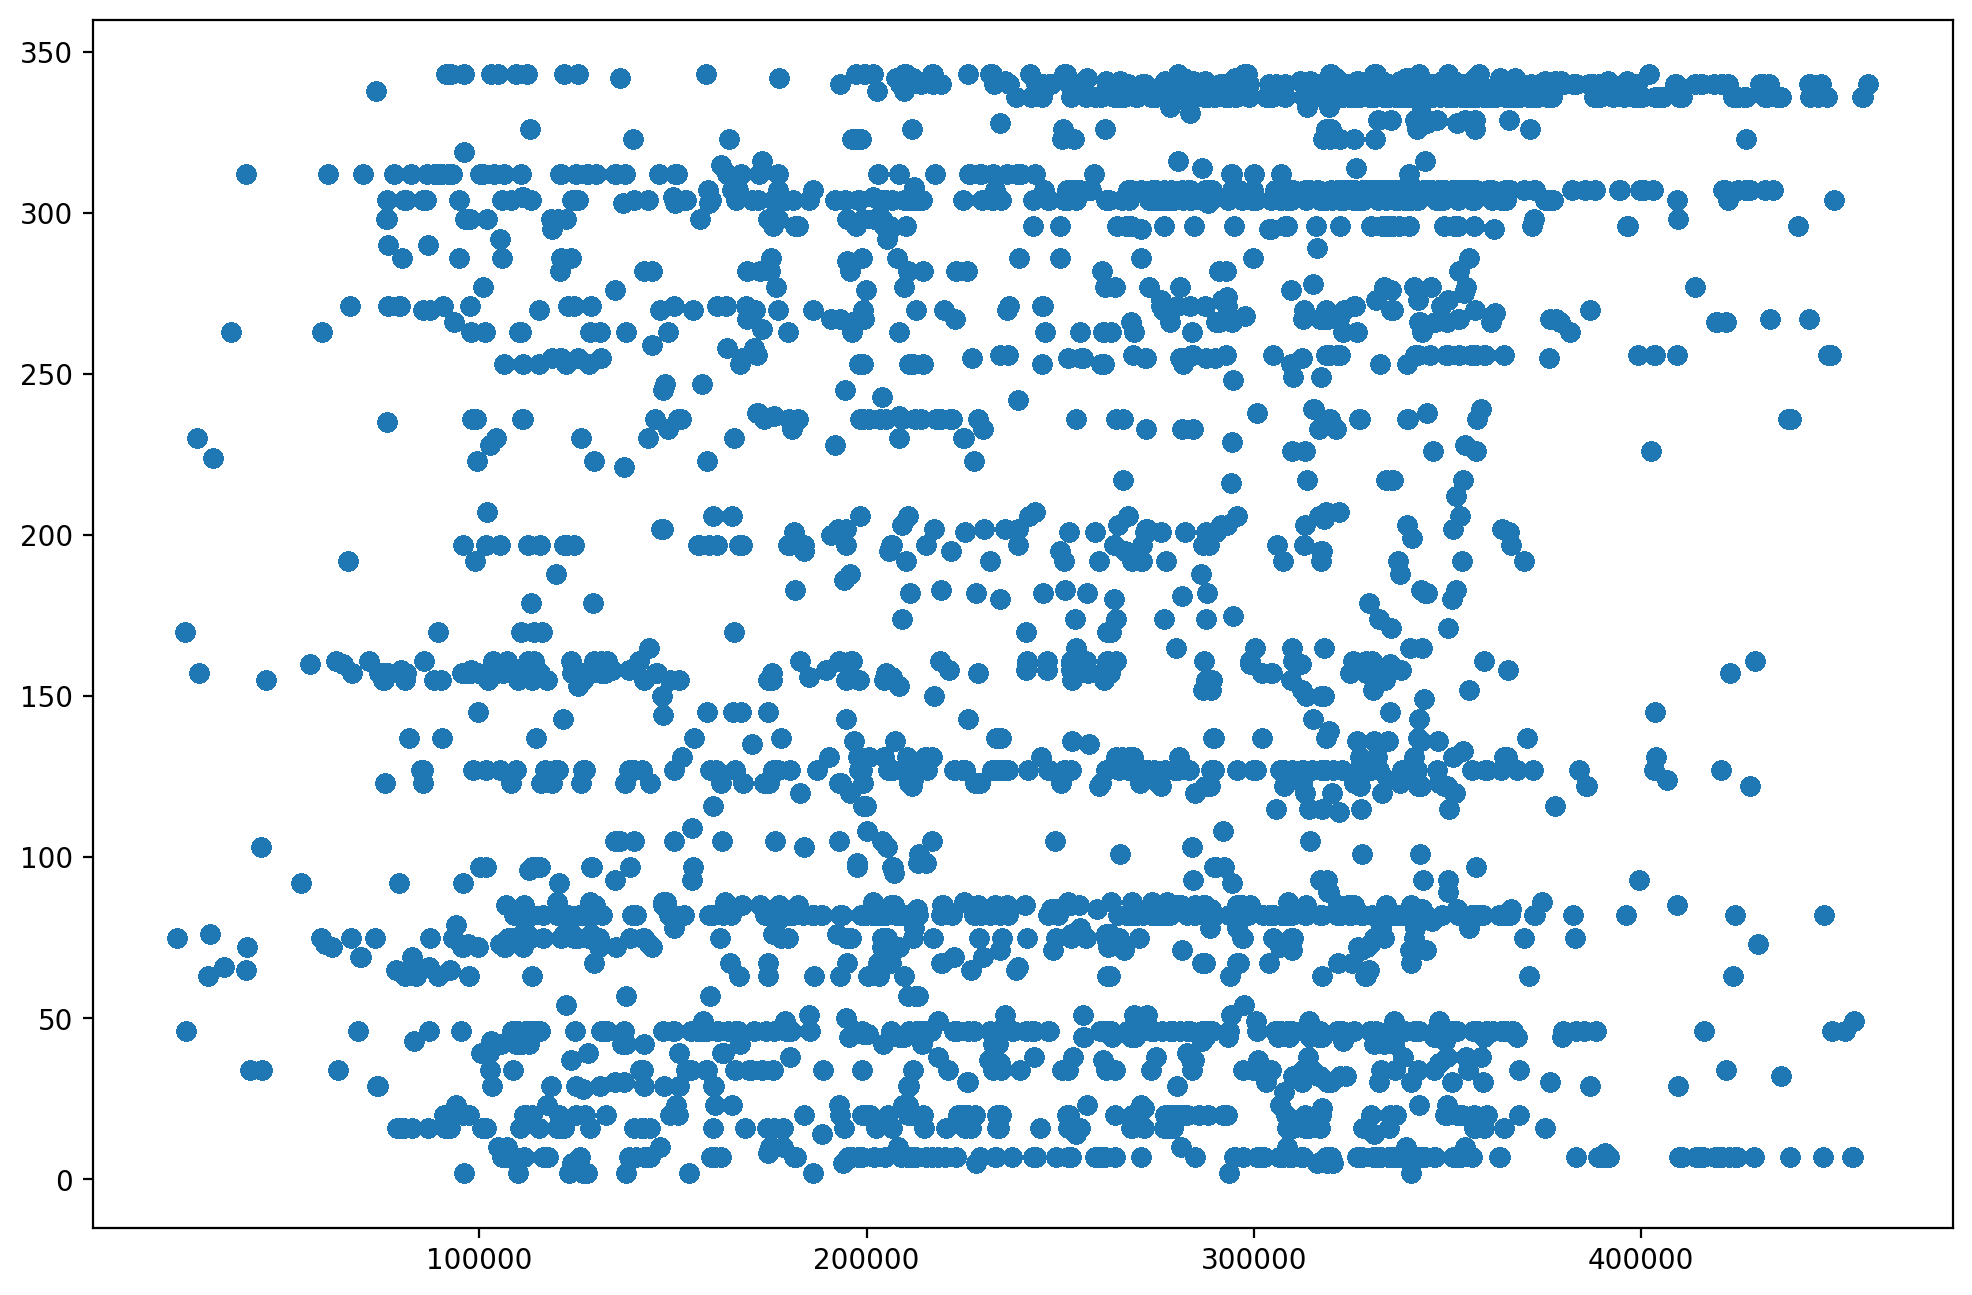

In [20]:
plt.plot(modelar["id"], modelar["categoria_dos"], 'o')

# "id" y "antigüedad"

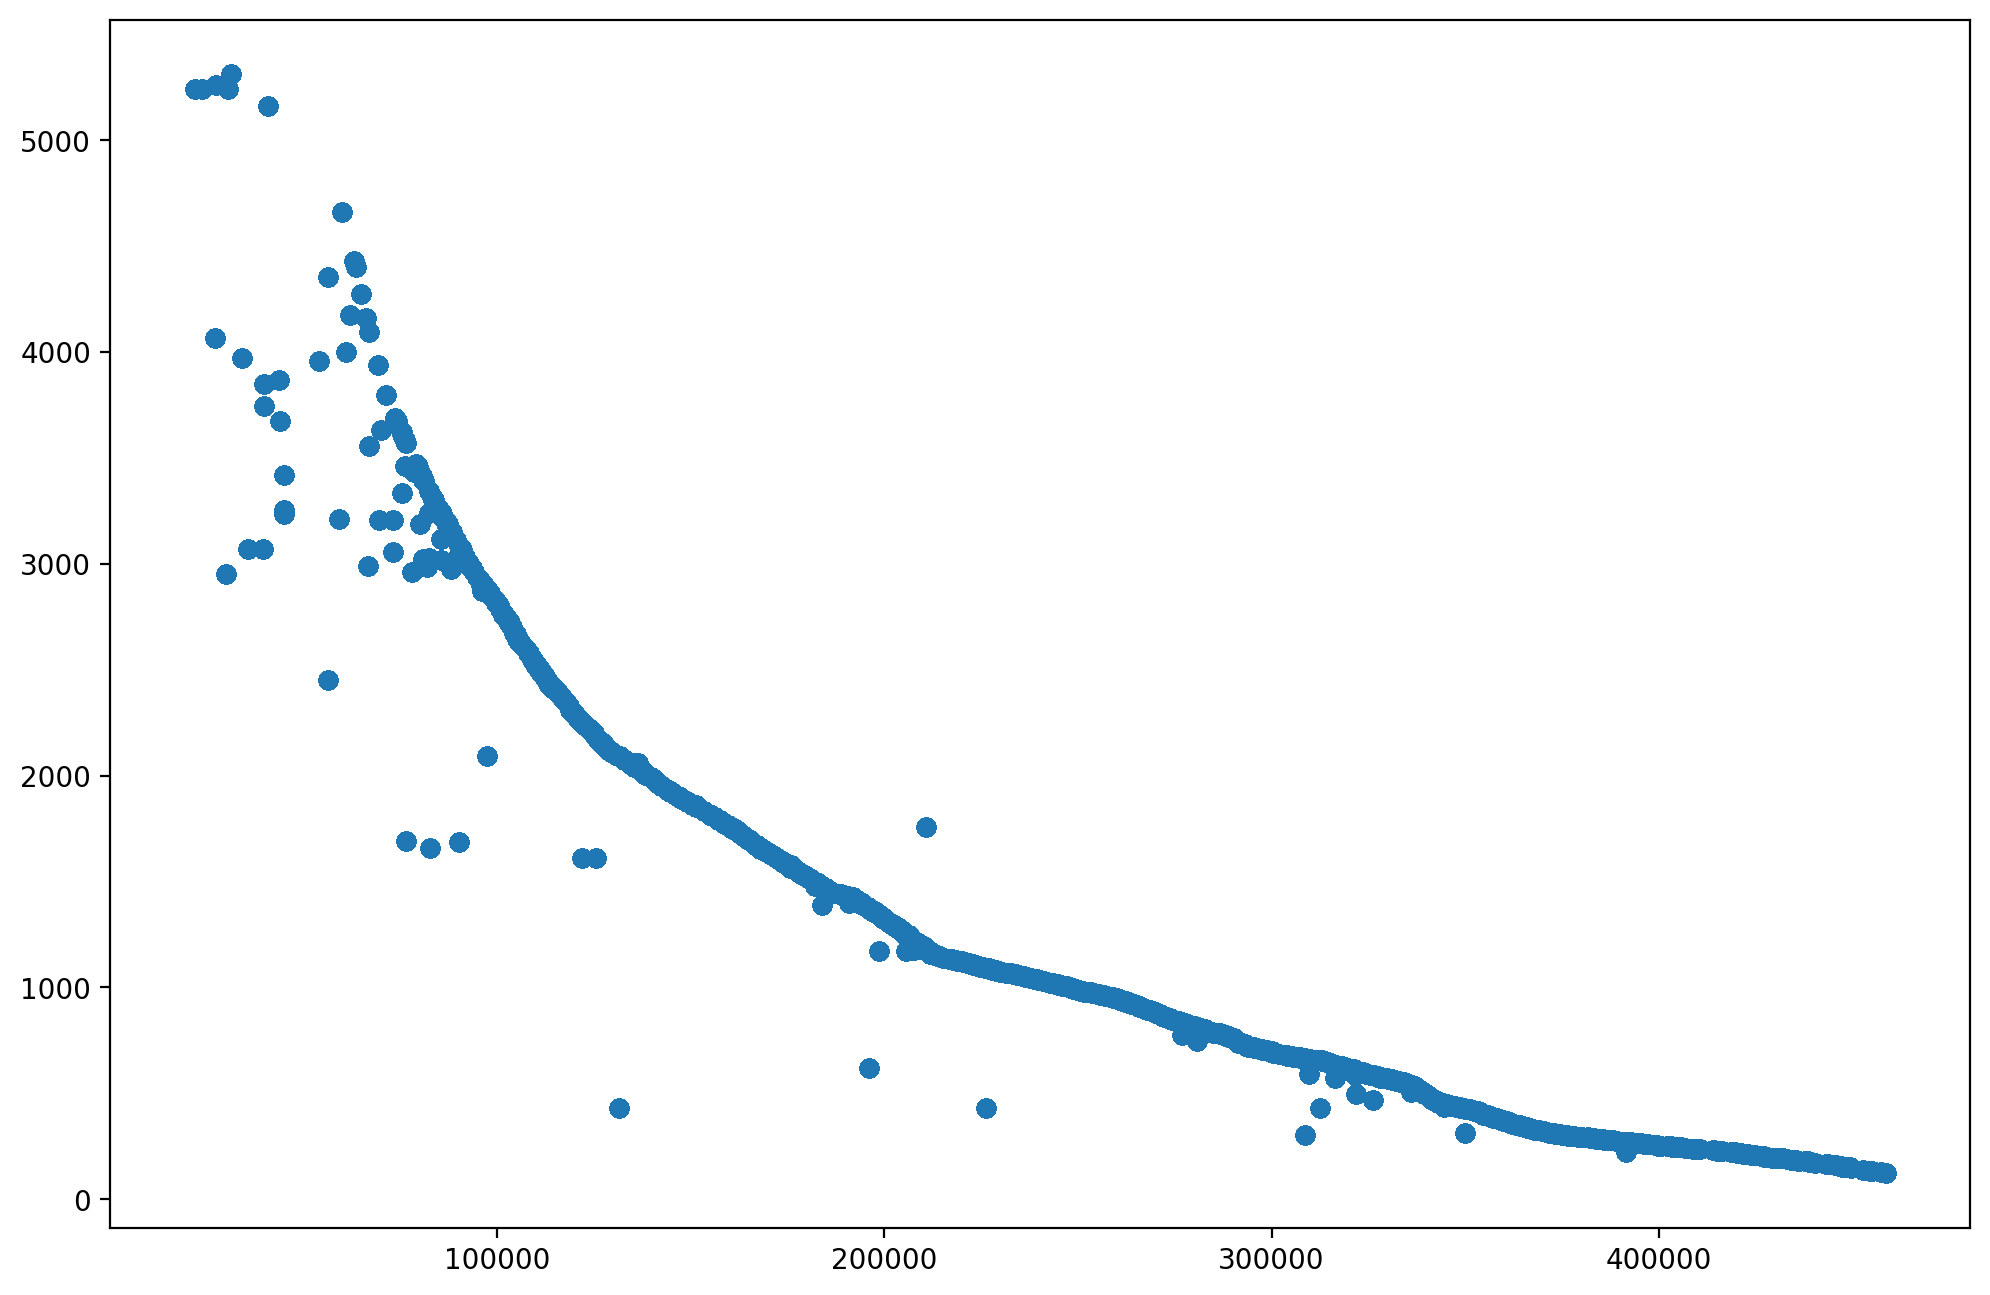

In [56]:
plt.plot(modelar["id"], modelar["antiguedad"], 'o')

Podremos ajustar usando algun polinomio y extrapolar los missing values de "antiguedad"

In [5]:
modelar_notna_antiguedad = modelar[modelar['antiguedad'].notna()]

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
polynomial_model = LinearRegression()


# Remember that for 1 variable we have to reshape it
X = modelar_notna_antiguedad["id"].values.reshape((-1,1))

polynomial_model.fit(X,modelar_notna_antiguedad["antiguedad"])

print("El modelo explica {:.2f}%  de antiguedad".format(polynomial_model.score(X,modelar_notna_antiguedad["antiguedad"])*100))



El modelo explica 88.69%  de antiguedad


# Ventas por semana del año

In [6]:
# Variable mes:
modelar["mes"] = modelar["fecha"].dt.month
estimar["mes"] = estimar["fecha"].dt.month

In [7]:
import datetime
def get_week_year(row):
    weekNumber = ((row - datetime.datetime(row.year,1,1)).days // 7) + 1
    return weekNumber
modelar["semana"] = modelar['fecha'].apply(get_week_year)

In [86]:
v_s_2015 = modelar[modelar["fecha"].dt.year == 2015]

In [96]:
v_s_2015[v_s_2015["semana"]==47]

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas,mes,semana
1420326,2015-11-19,21972,4,C,75.0,No Rotura,"5,84",1,0,5241.0,3,11,47
1420327,2015-11-19,23910,5,C,170.0,No Rotura,"6,12",1,0,5241.0,3,11,47
1420328,2015-11-19,24306,44,A,46.0,No Rotura,NaN,1,0,NaN,0,11,47
1420329,2015-11-19,24306,44,A,46.0,No Rotura,NaN,1,0,NaN,0,11,47
1420330,2015-11-19,27144,18,E,230.0,No Rotura,"6,42",1,0,4064.0,6,11,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478463,2015-11-25,457416,0,F,336.0,No Rotura,NaN,1,0,130.0,0,11,47
1478464,2015-11-25,457422,0,F,336.0,No Rotura,NaN,1,0,130.0,0,11,47
1478465,2015-11-25,458650,0,K,340.0,No Rotura,NaN,1,0,126.0,0,11,47
1478466,2015-11-25,458660,0,K,340.0,No Rotura,NaN,1,0,126.0,0,11,47


<AxesSubplot:xlabel='semana'>

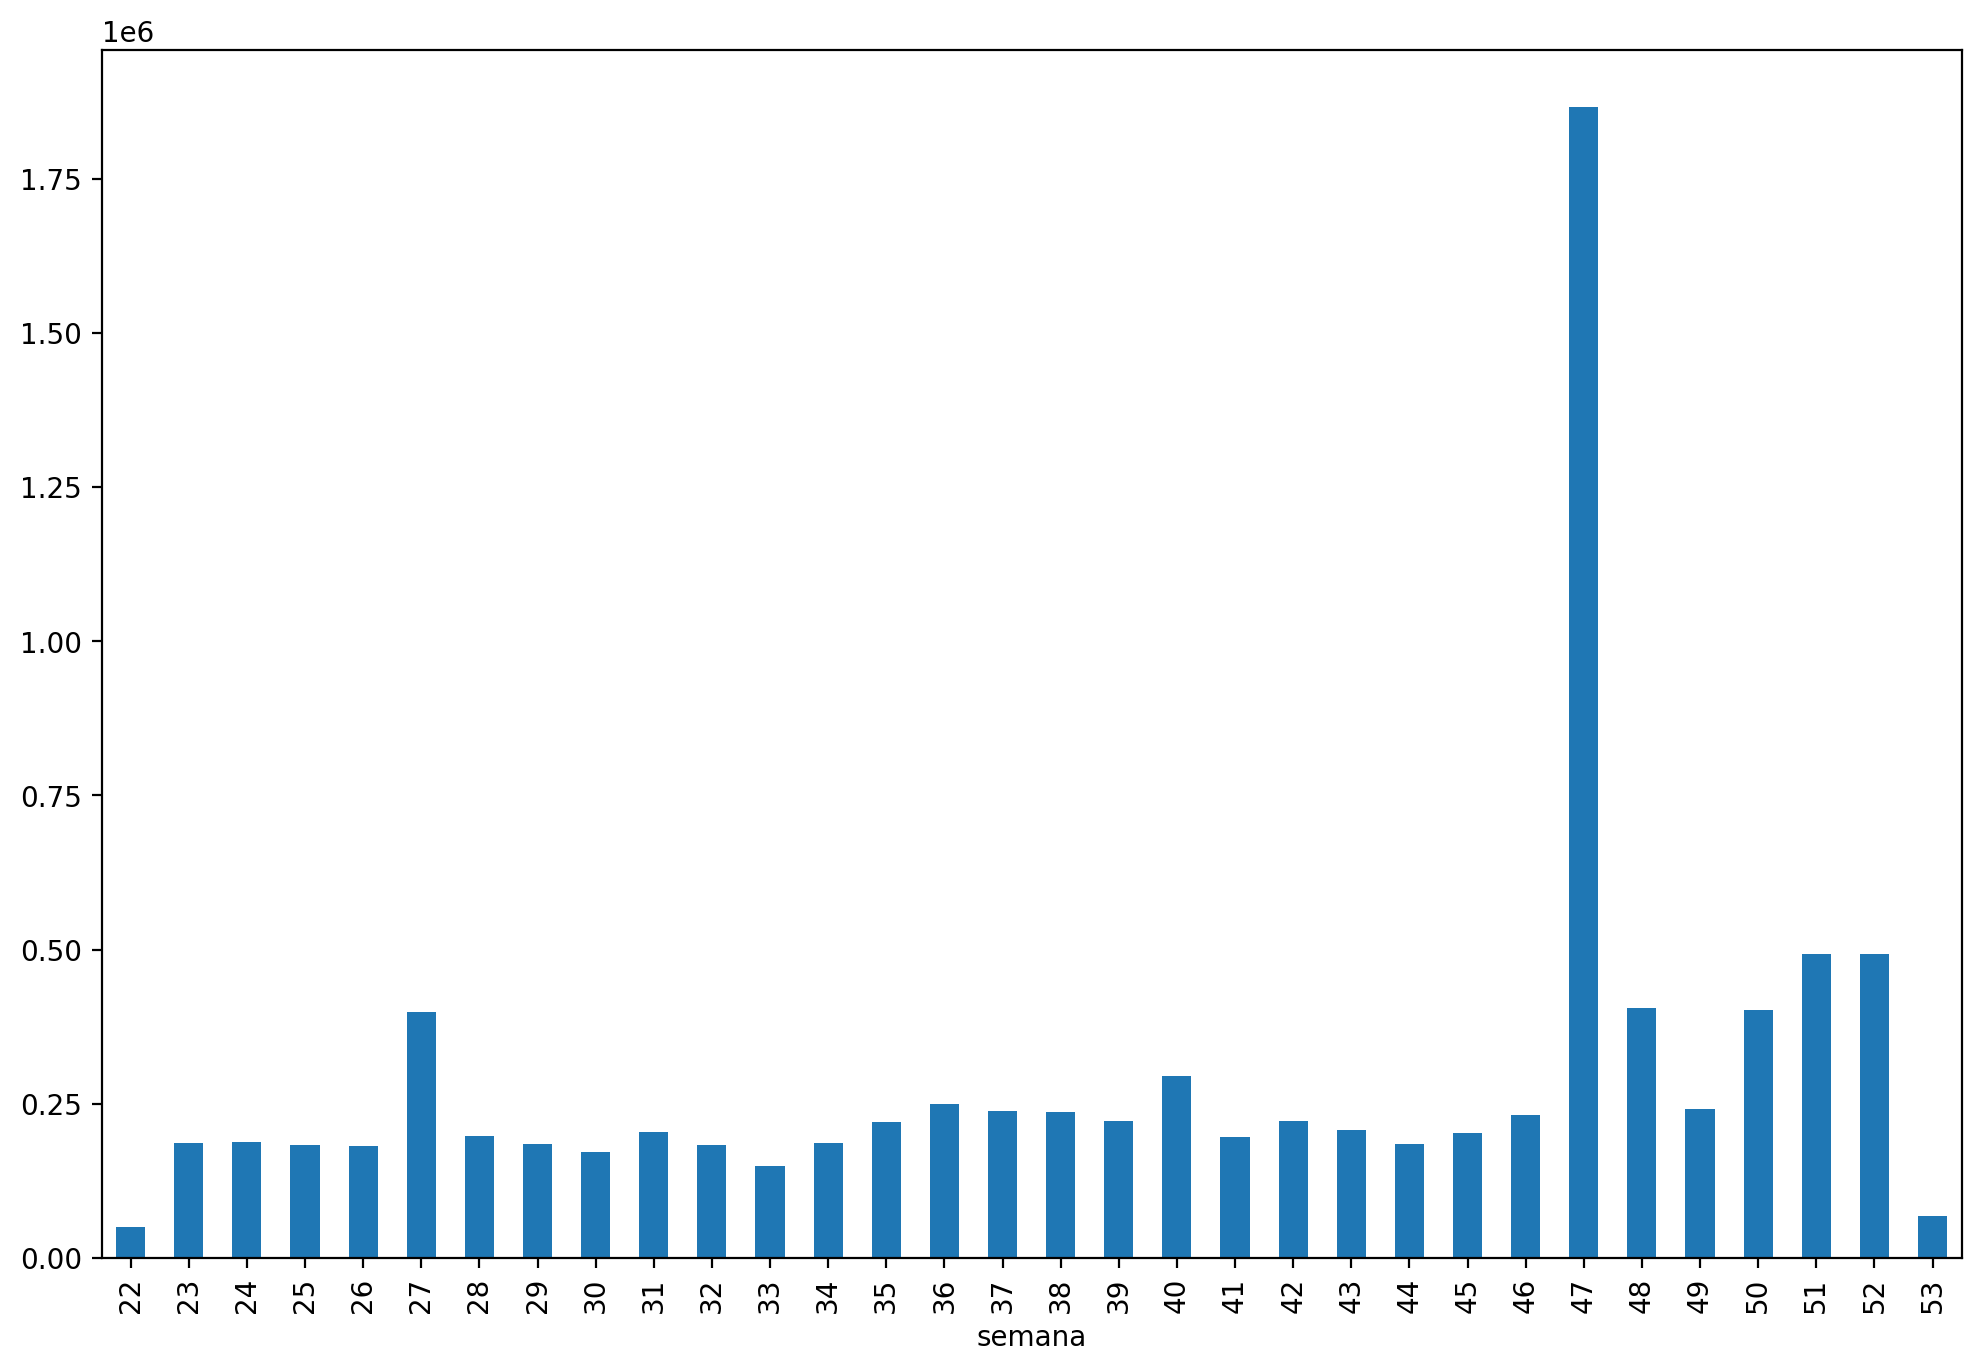

In [98]:
v_s_2015.groupby("semana")["unidades_vendidas"].sum().plot.bar()

In [89]:
v_s_2016 = modelar[modelar["fecha"].dt.year == 2016]

In [95]:
v_s_2016[v_s_2016["semana"]==27]

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas,mes,semana
3280870,2016-07-01,21972,5,C,75.0,No Rotura,NaN,1,0,5241.0,0,7,27
3280871,2016-07-01,23910,30,C,170.0,No Rotura,NaN,1,0,5241.0,0,7,27
3280872,2016-07-01,24306,0,A,46.0,Rotura,NaN,1,0,NaN,0,7,27
3280873,2016-07-01,24306,0,A,46.0,Rotura,NaN,1,0,NaN,0,7,27
3280874,2016-07-01,27144,80,E,230.0,No Rotura,"6,42",1,0,4064.0,12,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339007,2016-07-07,457416,0,F,336.0,No Rotura,NaN,1,0,130.0,0,7,27
3339008,2016-07-07,457422,0,F,336.0,No Rotura,NaN,1,0,130.0,0,7,27
3339009,2016-07-07,458650,0,K,340.0,No Rotura,NaN,1,0,126.0,0,7,27
3339010,2016-07-07,458660,0,K,340.0,No Rotura,NaN,1,0,126.0,0,7,27


<AxesSubplot:xlabel='semana'>

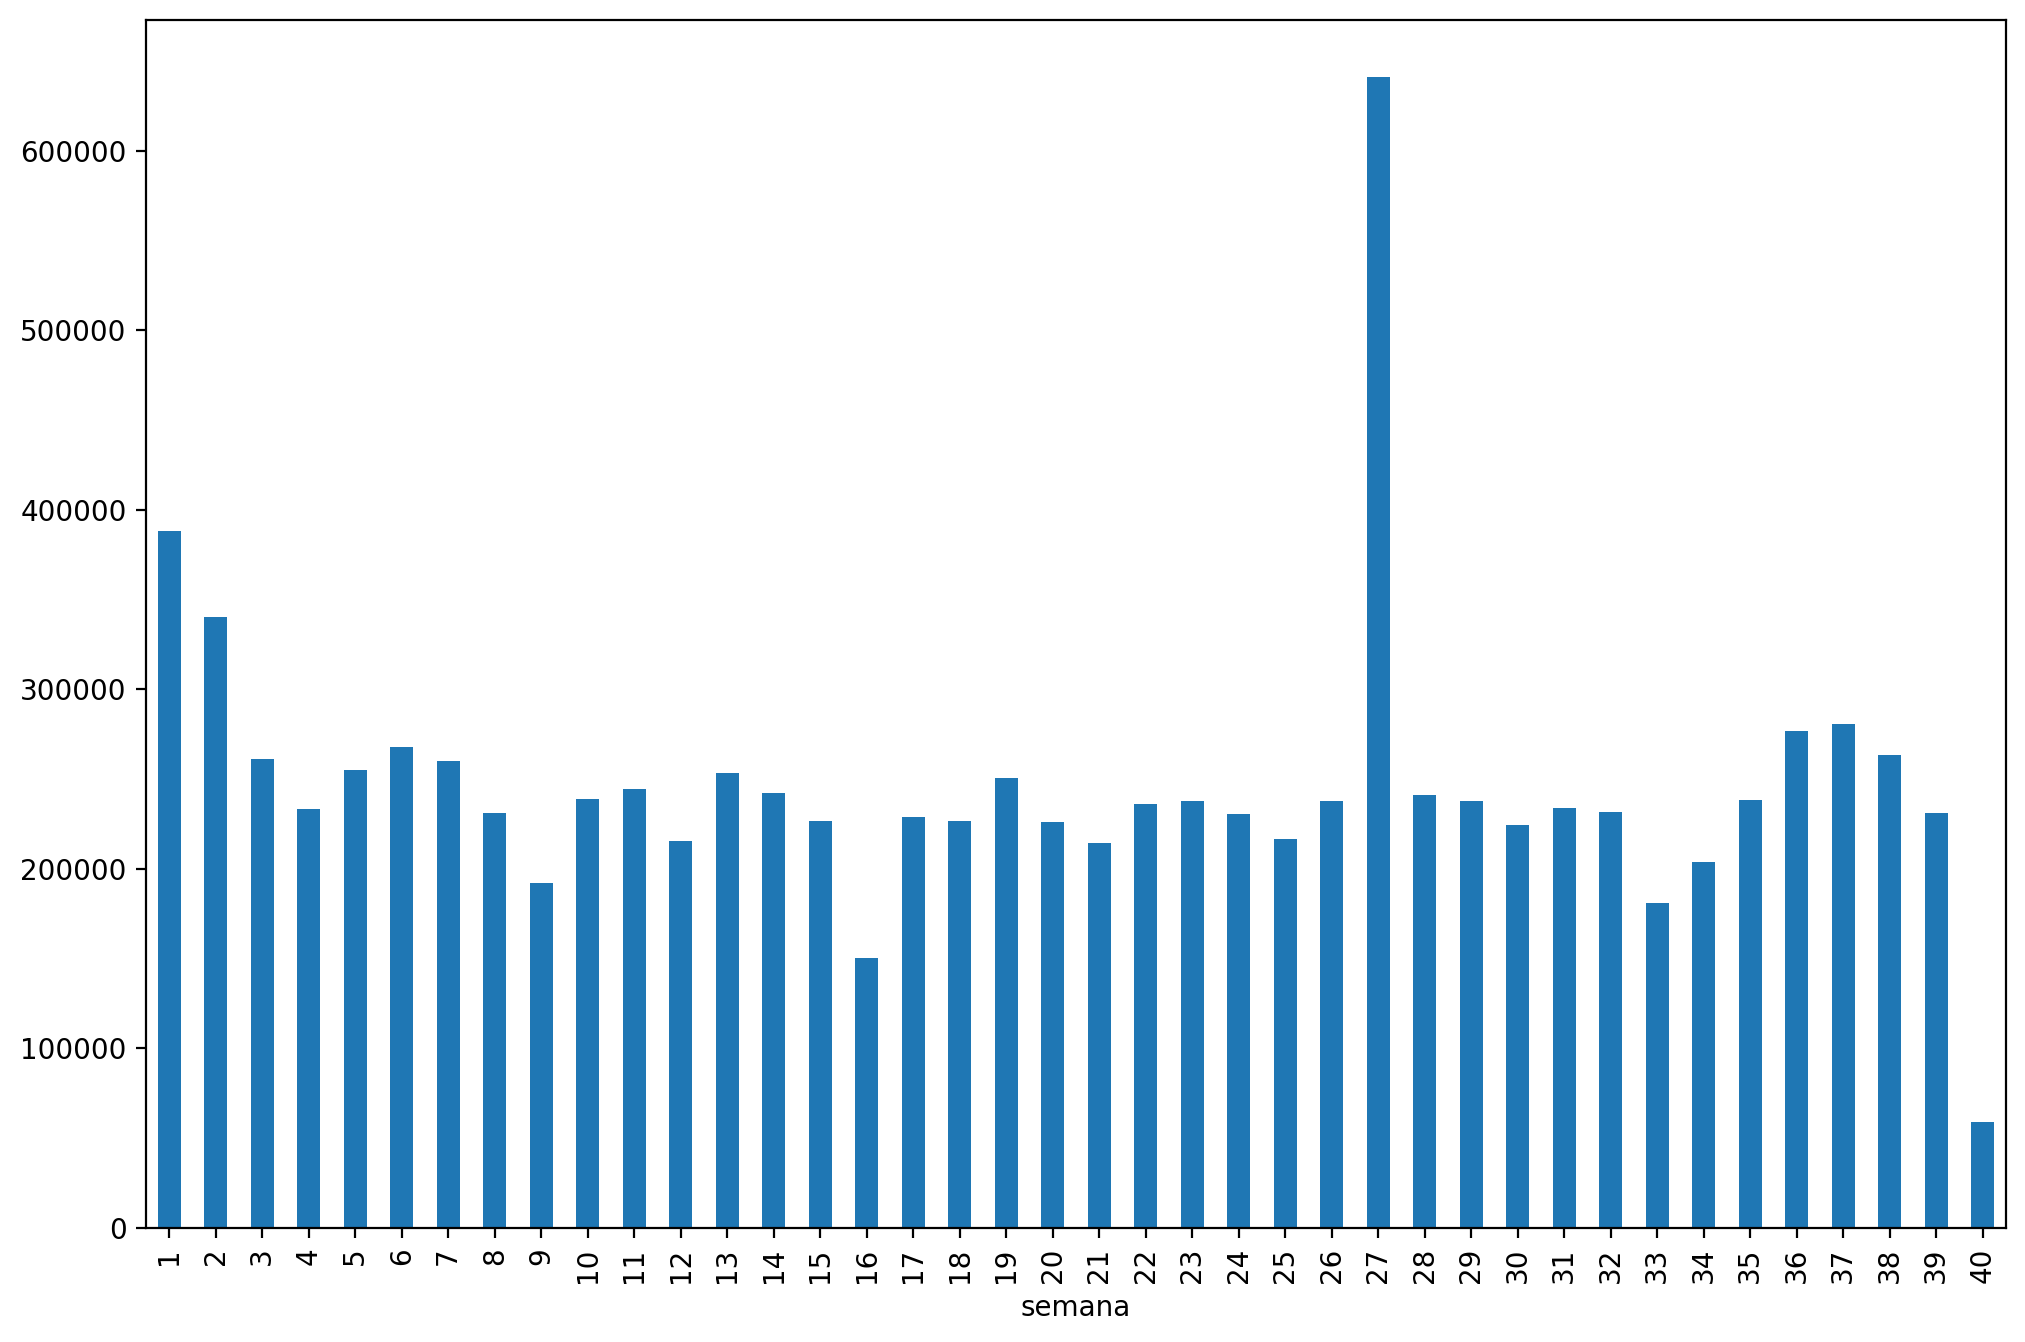

In [97]:
v_s_2016.groupby("semana")["unidades_vendidas"].sum().plot.bar()